The KNN algorithm is very simple to implement, as it does not need to be trained. The training phase merely stores the training data. For each test point, we calculate the distance of that data point to every existing data point and find the $K$ closest ones. What we return is the the most common amongst the top k classification nearest to the test point. Here's the pseudocode for _K_ Nearest Neighbors:

```
kNN:

    Learn:
        Store training set T to X_train: X_train <-- T


    Predict:
        for every point xp in X_predict:
            for every point x in X_train:
                calculate the distance d in D between x and xp
            sort D in increasing order
            take the "k" items in X_train with the smallest distances to x
            return the majority class among these k items
```

Note that for large data sets, the algorithm can take very long to classify because it has to calculate the distance between the test point and evey other point in the data!


# Distance Metrics - Note

As explained above, KNN assigns a class to the test point based on the majority class of  KK  nearest neighbours. In general, euclidean distance is used to find nearest neighbours, but other distance metrics can also be used.

As the dimensionality of the feature space increases, the euclidean distance often becomes problematic due to the curse of dimensionality (discussed later).

In such cases, alternative vector-based similarity measures (dot product, cosine similarity, etc) are used to find the nearest neighbours. This transforms the original metric space into one more amicable to point-to-point measurements.

Another distance measure that you might consider is Mahalanobis distance. Here's the wikipedia page on Mahalanobis distance. https://en.wikipedia.org/wiki/Mahalanobis_distance Mahalanobis distance attempts to weight features according to their probabilities. On some data sets that may be important.

In general, it's probably a good idea to normalize the data at a minimum. Here's a link to the scikit learn scaling package. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html . You have to be a little circumspect about employing any technique where the answers change with scaling.

### KNN self programmed version

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split


# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

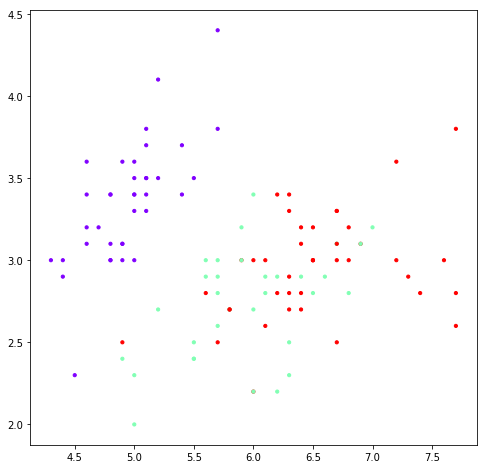

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap='rainbow');

In [33]:
y_train = y_train[:, np.newaxis]
X_train = np.hstack([X_train, y_train])

In [34]:
X_train

array([[6.5, 2.8, 1. ],
       [6.7, 2.5, 2. ],
       [6.8, 3. , 2. ],
       [5.1, 3.5, 0. ],
       [6. , 2.2, 2. ],
       [6.3, 2.9, 2. ],
       [6.6, 2.9, 1. ],
       [7.7, 2.6, 2. ],
       [5.7, 3.8, 0. ],
       [5. , 3.6, 0. ],
       [4.8, 3. , 0. ],
       [5.2, 2.7, 1. ],
       [5.1, 3.4, 0. ],
       [5.5, 3.5, 0. ],
       [7.7, 3.8, 2. ],
       [6.9, 3.1, 2. ],
       [7.3, 2.9, 2. ],
       [6.4, 2.8, 2. ],
       [6.2, 2.8, 2. ],
       [6. , 3.4, 1. ],
       [7.7, 2.8, 2. ],
       [5.7, 3. , 1. ],
       [4.8, 3.4, 0. ],
       [5.7, 2.5, 2. ],
       [6.3, 2.7, 2. ],
       [4.8, 3. , 0. ],
       [4.7, 3.2, 0. ],
       [6.5, 3. , 2. ],
       [4.6, 3.4, 0. ],
       [6.1, 3. , 2. ],
       [6.5, 3.2, 2. ],
       [6.7, 3.1, 1. ],
       [5.7, 2.8, 1. ],
       [6.7, 3.3, 2. ],
       [6. , 3. , 2. ],
       [5.1, 3.8, 0. ],
       [6. , 2.2, 1. ],
       [6.4, 2.9, 1. ],
       [6.5, 3. , 2. ],
       [5. , 2.3, 1. ],
       [6.3, 3.3, 2. ],
       [5.5, 2.5

In [17]:
def euclidean_distance(Xrow):
    p1, p2 = Xrow[0], Xrow[1]
    sum_squared_distance = 0
    sum_squared_distance += (p1**2
    return (sum_squared_distance)**(1/2)

In [ ]:
def knn(X_train, y_train, X_test):
    compare = np.array([])
    for i in range(len(X_test)):
        compare = np.array([])
        for j in range(len(X_train)):
            compare.append(((X_train[0][j]-X_test[0][i])**2 + (X_train[1][j]-X_test[1][i])**2)**(1/2))
            


        

In [18]:
euclidean_distance([4, 5])

1.0

In [ ]:
from collections import Counter
import math

def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

def main():
    '''
    # Regression Data
    # 
    # Column 0: height (inches)
    # Column 1: weight (pounds)
    '''
    reg_data = [
       [65.75, 112.99],
       [71.52, 136.49],
       [69.40, 153.03],
       [68.22, 142.34],
       [67.79, 144.30],
       [68.70, 123.30],
       [69.80, 141.49],
       [70.01, 136.46],
       [67.90, 112.37],
       [66.49, 127.45],
    ]
    
    # Question:
    # Given the data we have, what's the best-guess at someone's weight if they are 60 inches tall?
    reg_query = [60]
    reg_k_nearest_neighbors, reg_prediction = knn(
        reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean
    )
    
    '''
    # Classification Data
    # 
    # Column 0: age
    # Column 1: likes pineapple
    '''
    clf_data = [
       [22, 1],
       [23, 1],
       [21, 1],
       [18, 1],
       [19, 1],
       [25, 0],
       [27, 0],
       [29, 0],
       [31, 0],
       [45, 0],
    ]
    # Question:
    # Given the data we have, does a 33 year old like pineapples on their pizza?
    clf_query = [33]
    clf_k_nearest_neighbors, clf_prediction = knn(
        clf_data, clf_query, k=3, distance_fn=euclidean_distance, choice_fn=mode
    )

if __name__ == '__main__':
    main()

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()